In [3]:
import keras
import tensorflow as tf
import numpy as np

In [4]:
tf.__version__

'2.15.0'

## Download dataset
The Fashion-MNIST dataset contains thousands of grayscale images of Zalando fashion articles

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Understand the data format
Images as 3-D array of integer values that is of shape (N, 28, 28), where N is the number of images in the training or test set.
<br>The labels are 1-D array of the integer values of each image.

In [6]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

test labels are from 0 to 9

##Visualise the data
This function shows a random example along with its corresponding label.

Label: 7


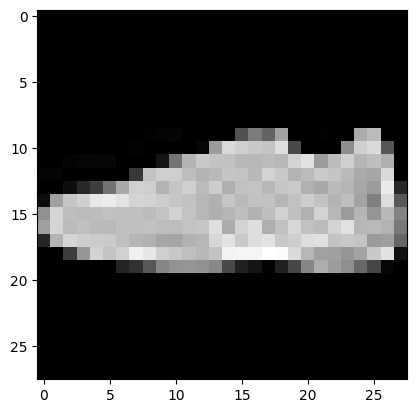

In [12]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

i = random.randint(0, 100)

print("Label: %s" % train_labels[i])
plt.imshow(train_images[i], cmap = "gray")

Each training and test example is assigned one of the following labels:
<br>0: T-shirt/top
<br>1: Trouser
<br>2: Pullover
<br>3: Dress
<br>4: Coat
<br>5: Sandal
<br>6: Shirt
<br>7: Sneaker
<br>8: Bag
<br>9: Ankle boot

## Reformat the images
Flatten (or unstack) the images. There are deep learning techniques that work with 2D images directly (rather than their flattened representation). Instead of working with a 28 by 28 image, unstack it into a 28*28=784 length array.


*   Convert the 3D array of shape (N, 28, 28) to a 2D array of shape (N, 784) where the second dimension is just an array of all the pixels in an image. This is called flattening, or unstacking, the images.
*   Convert the pixel values from a number between 0 and 255 to a number between 0 and 1



In [13]:
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

# Reshape from (N, 28, 28) to (N, 784)
train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
test_images = np.reshape(test_images, (TEST_SIZE, 784))

# Convert the array to float32 as opposed to uint8
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
train_images /= 255
test_images /= 255

##Reformat the labels
Convert the labels from an integer format (i.e. "2" or "Pullover"), to a one hot encoding (i.e. "0, 0, 1, 0, 0, 0, 0, 0, 0, 0)
<br>So that Neural Network Model can take more easily

In [15]:
NUM_CAT = 10
print("Before", train_labels[0]) # format of the labels before conversion
train_labels_ = tf.keras.utils.to_categorical(train_labels, NUM_CAT)
print("After", train_labels_[0]) # format of the labels after conversion
test_labels_ = tf.keras.utils.to_categorical(test_labels, NUM_CAT)

Before 9
After [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


##Build the model
Create Neural Network using Keras Sequential API. Keras is a high-level API to build and train deep learning models and is user friendly, modular and easy to extend.
<br>`tf.keras` is a TensorFlow's implementation of this API and it supports such things as eager execution, `tf.data` pipelines and Estimators.
<br>Architecture wise, use single hidden layer network, where:


*   The hidden layer will have 512 units using the ReLU activation function
*   The output layer will have 10 units using softmax function
*   Specify the input shape on the first layer. If add subsequent layers, it is not necessary.
*   Use categorical crossentropy loss function, and the SGD optimiser


In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu, input_dim = 784))
model.add(tf.keras.layers.Dense(NUM_CAT, activation = tf.nn.softmax))

# Compile and print summary of the model
opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
model.compile(loss = "categorical_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Training
Train the model using fit method for 5 epochs. Keep track of the training loss and accuracy as the process goes.

In [18]:
train_labels_.shape

(60000, 10)

In [19]:
# can also include validation loss in the fit function
model.fit(train_images, train_labels_, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5181 - accuracy: 0.8163
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3827 - accuracy: 0.8602
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3462 - accuracy: 0.8738
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3221 - accuracy: 0.8819
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.8885


##Testing
Evaluate the model

In [22]:
loss, accuracy = model.evaluate(test_images, test_labels_)
print("Test accuracy: %.2f" % accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8720
Test accuracy: 0.87
